In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
health_spending = pd.read_csv('../data/health_spending.csv')
state_health = pd.read_csv('../data/state_health.csv', )

In [3]:
health_spending.head()

,state,total_veterans,vets_using_va_healthcare,medical_expenditure_thousands
0,United States,1.946570e+07,6108277,8.680791e+07
1,Alabama,3.629009e+05,115440,1.445770e+06
2,Alaska,6.938363e+04,21685,4.175775e+05
3,Arizona,5.044514e+05,163613,2.308161e+06
4,Arkansas,2.025173e+05,83510,1.208500e+06


In [4]:
state_health.head()

,state,total_pop,diabetes,prediabetes,cardio_disease,hypertension,overweight_obese,severely_obese,asthma,mental_illness,serious_mental_illness,smoker,alcohol_abuse,drug_abuse,exercise,no_doctor,self_report_low_health
0,United States,319249300.0,0.121,0.021,0.075,0.326,0.654,0.050,0.091,0.208,0.054,0.164,0.110,0.068,0.774,0.201,0.147
1,Alabama,4767100.0,0.167,0.018,0.101,0.425,0.702,0.067,0.109,0.212,0.062,0.209,0.093,0.056,0.715,0.166,0.211
2,Alaska,701700.0,0.090,0.029,0.061,0.328,0.667,0.048,0.084,0.222,0.058,0.210,0.113,0.079,0.798,0.306,0.129
3,Arizona,7098000.0,0.121,0.025,0.075,0.325,0.648,0.045,0.098,0.239,0.064,0.156,0.119,0.078,0.780,0.238,0.157
4,Arkansas,2922500.0,0.156,0.012,0.116,0.410,0.705,0.063,0.096,0.226,0.073,0.223,0.091,0.078,0.696,0.179,0.220


In [5]:
df = health_spending.merge(state_health, on='state')

In [6]:
df.head()

,state,total_veterans,vets_using_va_healthcare,medical_expenditure_thousands,total_pop,diabetes,prediabetes,cardio_disease,hypertension,overweight_obese,severely_obese,asthma,mental_illness,serious_mental_illness,smoker,alcohol_abuse,drug_abuse,exercise,no_doctor,self_report_low_health
0,United States,1.946570e+07,6108277,8.680791e+07,319249300.0,0.121,0.021,0.075,0.326,0.654,0.050,0.091,0.208,0.054,0.164,0.110,0.068,0.774,0.201,0.147
1,Alabama,3.629009e+05,115440,1.445770e+06,4767100.0,0.167,0.018,0.101,0.425,0.702,0.067,0.109,0.212,0.062,0.209,0.093,0.056,0.715,0.166,0.211
2,Alaska,6.938363e+04,21685,4.175775e+05,701700.0,0.090,0.029,0.061,0.328,0.667,0.048,0.084,0.222,0.058,0.210,0.113,0.079,0.798,0.306,0.129
3,Arizona,5.044514e+05,163613,2.308161e+06,7098000.0,0.121,0.025,0.075,0.325,0.648,0.045,0.098,0.239,0.064,0.156,0.119,0.078,0.780,0.238,0.157
4,Arkansas,2.025173e+05,83510,1.208500e+06,2922500.0,0.156,0.012,0.116,0.410,0.705,0.063,0.096,0.226,0.073,0.223,0.091,0.078,0.696,0.179,0.220


In [7]:
df['perc_vets_using_va_health'] = df['vets_using_va_healthcare']/df['total_veterans']

In [8]:
df

,state,total_veterans,vets_using_va_healthcare,medical_expenditure_thousands,total_pop,diabetes,prediabetes,cardio_disease,hypertension,overweight_obese,severely_obese,asthma,mental_illness,serious_mental_illness,smoker,alcohol_abuse,drug_abuse,exercise,no_doctor,self_report_low_health,perc_vets_using_va_health
0,United States,1.946570e+07,6108277,8.680791e+07,319249300.0,0.121,0.021,0.075,0.326000,0.654,0.050,0.091,0.208,0.054,0.164,0.110,0.068,0.774,0.201,0.147,0.313797
1,Alabama,3.629009e+05,115440,1.445770e+06,4767100.0,0.167,0.018,0.101,0.425000,0.702,0.067,0.109,0.212,0.062,0.209,0.093,0.056,0.715,0.166,0.211,0.318103
2,Alaska,6.938363e+04,21685,4.175775e+05,701700.0,0.090,0.029,0.061,0.328000,0.667,0.048,0.084,0.222,0.058,0.210,0.113,0.079,0.798,0.306,0.129,0.312538
3,Arizona,5.044514e+05,163613,2.308161e+06,7098000.0,0.121,0.025,0.075,0.325000,0.648,0.045,0.098,0.239,0.064,0.156,0.119,0.078,0.780,0.238,0.157,0.324338
4,Arkansas,2.025173e+05,83510,1.208500e+06,2922500.0,0.156,0.012,0.116,0.410000,0.705,0.063,0.096,0.226,0.073,0.223,0.091,0.078,0.696,0.179,0.220,0.412360
5,California,1.659401e+06,459981,7.851926e+06,38642700.0,0.099,0.032,0.057,0.278000,0.609,0.039,0.079,0.205,0.046,0.113,0.128,0.067,0.803,0.235,0.146,0.277197
6,Colorado,3.921155e+05,111754,1.521326e+06,5611800.0,0.088,0.023,0.056,0.258000,0.587,0.032,0.093,0.232,0.059,0.146,0.133,0.090,0.836,0.236,0.110,0.285003
7,Connecticut,1.674545e+05,47687,8.001327e+05,3453300.0,0.108,0.017,0.069,0.309000,0.632,0.042,0.107,0.188,0.048,0.127,0.122,0.067,0.800,0.127,0.117,0.284776
8,Delaware,7.033957e+04,17330,2.351359e+05,940300.0,0.139,0.017,0.083,0.364000,0.685,0.062,0.106,0.205,0.054,0.170,0.108,0.058,0.746,0.158,0.154,0.246376
9,District of Columbia,2.892831e+04,7677,2.786526e+05,671300.0,0.091,0.029,0.049,0.272000,0.539,0.036,0.094,0.230,0.050,0.145,0.178,0.097,0.834,0.179,0.104,0.265380


In [22]:
X = df.drop(columns = ['state', 'total_veterans', 'vets_using_va_healthcare', 'medical_expenditure_thousands', 'total_pop', 'perc_vets_using_va_health'])
y = df['medical_expenditure_thousands']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=987)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.050792455634399714, -13.277988541668389)

In [24]:
pd.DataFrame(lr.coef_, X_train.columns)

,0
diabetes,-3.471659e+07
prediabetes,6.612613e+07
cardio_disease,1.792907e+08
hypertension,-1.046040e+08
overweight_obese,4.194800e+07
severely_obese,-5.811220e+06
asthma,-5.463244e+07
mental_illness,3.539707e+07
serious_mental_illness,-4.421677e+08
smoker,-3.263103e+07


In [12]:
lr.coef_

array([-0.65413228,  0.89688769,  2.64893593, -0.55585401,  0.62430067,
       -2.77684429, -1.30051631,  0.34381249,  1.38498172,  0.69503329,
       -0.29087998,  0.15911844, -0.17567521, -0.17232818,  0.05399986])

<AxesSubplot:>

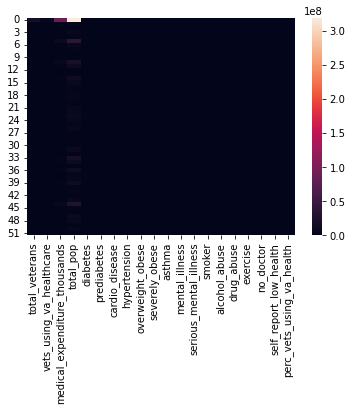

In [13]:
sns.heatmap(df.drop(columns='state'))